In [ ]:
!git clone https://github.com/rkuo2000/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 3390, done.
remote: Total 3390 (delta 0), reused 0 (delta 0), pack-reused 3390
Receiving objects: 100% (3390/3390), 7.02 MiB | 12.42 MiB/s, done.
Resolving deltas: 100% (2274/2274), done.
/content/yolov5


In [ ]:
!echo "train: Dataset/train/images" > data/alpr.yaml
!echo "val:   Dataset/train/images" >> data/alpr.yaml

!echo "nc : 1" >> data/alpr.yaml
!echo "names: ['license']" >> data/alpr.yaml


In [ ]:
import os
import numpy as np
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile

In [ ]:
FILE_ROOT = "/content/drive/MyDrive/new_plate/"
IMAGE_PATH = FILE_ROOT + "images"  
ANNOTATIONS_PATH = FILE_ROOT + "annotations"

DATA_ROOT = "Dataset/"
DEST_IMAGES_PATH = "train/images"
DEST_LABELS_PATH = "train/labels"

In [ ]:
!mkdir -p Dataset/train/labels

In [ ]:
!mkdir -p Dataset/train

In [ ]:
!cp -rf /content/drive/MyDrive/new_plate/images Dataset/train

In [ ]:
!mkdir -p Dataset/val
!cp -rf /content/drive/MyDrive/new_plate/images/Cars1*.png Dataset/val

In [ ]:
def cord_converter(size, box):
    """
    convert xml annotation to darknet format coordinates
    :param size： [w,h]
    :param box: anchor box coordinates [upper-left x,uppler-left y,lower-right x, lower-right y]
    :return: converted [x,y,w,h]
    """
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]
    
def save_file(img_jpg_file_name, size, img_box):
    classes = ['license']
    save_file_name = DATA_ROOT + DEST_LABELS_PATH + '/' + img_jpg_file_name + '.txt'
    print(save_file_name)
    file_path = open(save_file_name, "a+")
    for box in img_box:                  
        #cls_num = classes.index(box[0]) # find class_id
        cls_num = 0
        new_box = cord_converter(size, box[1:]) # convert box coord into YOLO x,y,w,h

        file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

    file_path.flush()
    file_path.close()
    
def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    print(img_path)
    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
    # print("img_name:", img_name)
    # print("image_info:(w,h,c)", img_w, img_h, img_c)
    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        print("box:(c,xmin,ymin,xmax,ymax)", cls_name, x1, y1, x2, y2)
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
    # print(img_box)
    save_file(img_xml_file, [img_w, img_h], img_box) 

In [ ]:
files = os.listdir(ANNOTATIONS_PATH)
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    get_xml_data(ANNOTATIONS_PATH, file_xml[0])

file name:  Cars0.xml
/content/drive/MyDrive/new_plate/annotations/Cars0.xml
box:(c,xmin,ymin,xmax,ymax) licence 226 125 419 173
Dataset/train/labels/Cars0.txt
file name:  Cars1.xml
/content/drive/MyDrive/new_plate/annotations/Cars1.xml
box:(c,xmin,ymin,xmax,ymax) licence 134 128 262 160
Dataset/train/labels/Cars1.txt
file name:  Cars106.xml
/content/drive/MyDrive/new_plate/annotations/Cars106.xml
box:(c,xmin,ymin,xmax,ymax) licence 138 79 177 92
box:(c,xmin,ymin,xmax,ymax) licence 245 79 270 94
box:(c,xmin,ymin,xmax,ymax) licence 169 202 192 231
box:(c,xmin,ymin,xmax,ymax) licence 225 194 279 217
Dataset/train/labels/Cars106.txt
file name:  Cars103.xml
/content/drive/MyDrive/new_plate/annotations/Cars103.xml
box:(c,xmin,ymin,xmax,ymax) licence 230 129 248 134
box:(c,xmin,ymin,xmax,ymax) licence 189 116 202 121
Dataset/train/labels/Cars103.txt
file name:  Cars105.xml
/content/drive/MyDrive/new_plate/annotations/Cars105.xml
box:(c,xmin,ymin,xmax,ymax) licence 152 147 206 159
Dataset/tra

In [ ]:
!mkdir -p Dataset/val/labels
!cp -rf Dataset/train/labels/Cars1*.txt Dataset/val/labels

In [ ]:
!ls Dataset/train/labels

Cars0.txt    Cars166.txt  Cars231.txt  Cars298.txt  Cars363.txt  Cars429.txt
Cars100.txt  Cars167.txt  Cars232.txt  Cars299.txt  Cars364.txt  Cars42.txt
Cars101.txt  Cars168.txt  Cars233.txt  Cars29.txt   Cars365.txt  Cars430.txt
Cars102.txt  Cars169.txt  Cars234.txt  Cars2.txt    Cars366.txt  Cars431.txt
Cars103.txt  Cars16.txt   Cars235.txt  Cars300.txt  Cars367.txt  Cars432.txt
Cars104.txt  Cars170.txt  Cars236.txt  Cars301.txt  Cars368.txt  Cars43.txt
Cars105.txt  Cars171.txt  Cars237.txt  Cars302.txt  Cars369.txt  Cars44.txt
Cars106.txt  Cars172.txt  Cars238.txt  Cars303.txt  Cars36.txt	 Cars45.txt
Cars107.txt  Cars173.txt  Cars239.txt  Cars304.txt  Cars370.txt  Cars46.txt
Cars108.txt  Cars174.txt  Cars23.txt   Cars305.txt  Cars371.txt  Cars47.txt
Cars109.txt  Cars175.txt  Cars240.txt  Cars306.txt  Cars372.txt  Cars48.txt
Cars10.txt   Cars176.txt  Cars241.txt  Cars307.txt  Cars373.txt  Cars49.txt
Cars110.txt  Cars177.txt  Cars242.txt  Cars308.txt  Cars374.txt  Cars4.txt
Cars111.tx

In [ ]:
!pip install -U PyYAML

     |████████████████████████████████| 645kB 7.4MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install torch==1.7.0+cu110 torchvision==0.8.1+cu110 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████▌        | 834.1MB 1.4MB/s eta 0:03:42tcmalloc: large alloc 1147494400 bytes == 0x55f8ce0a2000 @  0x7f2381c44615 0x55f894b46cdc 0x55f894c2652a 0x55f894b49afd 0x55f894c3afed 0x55f894bbd988 0x55f894bb84ae 0x55f894b4b3ea 0x55f894bbd7f0 0x55f894bb84ae 0x55f894b4b3ea 0x55f894bba32a 0x55f894c3be36 0x55f894bb9853 0x55f894c3be36 0x55f894bb9853 0x55f894c3be36 0x55f894bb9853 0x55f894c3be36 0x55f894cbe3e1 0x55f894c1e6a9 0x55f894b89cc4 0x55f894b4a559 0x55f894bbe4f8 0x55f894b4b30a 0x55f894bb93b5 0x55f894bb87ad 0x55f894b4b3ea 0x55f894bb93b5 0x55f894b4b30a 0x55f894bb93b5
     |█████████████████████████████▊  | 1055.7MB 1.2MB/s eta 0:01:10tcmalloc: large alloc 1434370048 bytes == 0x55f9126f8000 @  0x7f2381c44615 0x55f894b46cdc 0x55f894c2652a 0x55f894b49afd 0x55f894c3afed 0x55f894bbd988 0x55f894bb84ae 0x55f894b4b3ea 0x55f894bbd7f0 0x55f894bb84ae 0x55f894b4b3ea 0x55f894bba32a 0x55f894c3be36 0x55f894bb9853 0

In [ ]:
!python train.py --img 416 --batch 16 --epochs 300 --data data/alpr.yaml --cfg models/yolov5s.yaml

Using torch 1.7.0+cu110 CUDA:0 (Tesla T4, 15109MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='models/yolov5s.yaml', data='data/alpr.yaml', device='', epochs=300, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/exp', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2021-06-11 17:35:24.480489: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.

In [ ]:
%cd ..
!git clone https://github.com/openalpr/benchmarks

/content
Cloning into 'benchmarks'...
remote: Enumerating objects: 1752, done.
remote: Total 1752 (delta 0), reused 0 (delta 0), pack-reused 1752
Receiving objects: 100% (1752/1752), 187.98 MiB | 35.22 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!python detect.py --source ../benchmarks/endtoend/us --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='../benchmarks/endtoend/us', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
Using torch 1.7.0+cu110 CUDA:0 (Tesla T4, 15109MB)

Fusing layers... 
Model Summary: 232 layers, 7246518 parameters, 0 gradients
image 1/222 /content/benchmarks/endtoend/us/0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.jpg: 384x640 1 licenses, Done. (0.024s)
image 2/222 /content/benchmarks/endtoend/us/12c6cb72-3ea3-49e7-b381-e0cdfc5e8960.jpg: 384x640 Done. (0.013s)
image 3/222 /content/benchmarks/endtoend/us/1e241dc8-8f18-4955-8988-03a0ab49f813.jpg: 384x640 1 licenses, Done. (0.014s)
image 4/222 /content/benchmarks/endtoend/us/21d8c31d-3deb-494b-9c63-c0223306fd82.jpg: 384x640 1 licenses, Done. (0.014s)
image 5/222 /content/benchmarks/endtoend/us/22e54a62-57a8-4a0a-88c1-4b9758f67651.jpg: 384x

In [ ]:
!python detect.py --source ../benchmarks/endtoend/eu --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='../benchmarks/endtoend/eu', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
Using torch 1.7.0+cu110 CUDA:0 (Tesla T4, 15109MB)

Fusing layers... 
Model Summary: 232 layers, 7246518 parameters, 0 gradients
image 1/108 /content/benchmarks/endtoend/eu/eu1.jpg: 480x640 2 licenses, Done. (0.021s)
image 2/108 /content/benchmarks/endtoend/eu/eu10.jpg: 544x640 2 licenses, Done. (0.021s)
image 3/108 /content/benchmarks/endtoend/eu/eu11.jpg: 416x640 1 licenses, Done. (0.022s)
image 4/108 /content/benchmarks/endtoend/eu/eu2.jpg: 480x640 1 licenses, Done. (0.014s)
image 5/108 /content/benchmarks/endtoend/eu/eu3.jpg: 480x640 1 licenses, Done. (0.013s)
image 6/108 /content/benchmarks/endtoend/eu/eu4.jpg: 416x640 Done. (0.013s)
image 7/108 /content/benchmarks/endtoend/eu/

In [ ]:
!python detect.py --source ../benchmarks/endtoend/br --conf 0.4 --weights runs/train/exp/weights/best.pt --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='../benchmarks/endtoend/br', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
Using torch 1.7.0+cu110 CUDA:0 (Tesla T4, 15109MB)

Fusing layers... 
Model Summary: 232 layers, 7246518 parameters, 0 gradients
image 1/115 /content/benchmarks/endtoend/br/AYO9034.jpg: 384x640 1 licenses, Done. (0.022s)
image 2/115 /content/benchmarks/endtoend/br/AZJ6991.jpg: 640x640 1 licenses, Done. (0.014s)
image 3/115 /content/benchmarks/endtoend/br/FZB9581.jpg: 640x640 1 licenses, Done. (0.014s)
image 4/115 /content/benchmarks/endtoend/br/GWT2180.jpg: 384x640 1 licenses, Done. (0.014s)
image 5/115 /content/benchmarks/endtoend/br/HPM9362.jpg: 480x640 1 licenses, Done. (0.022s)
image 6/115 /content/benchmarks/endtoend/br/JGZ3298.jpg: 480x640 1 licenses, Done. (0.014s)
image 7/11

In [ ]:
from IPython.display import Image

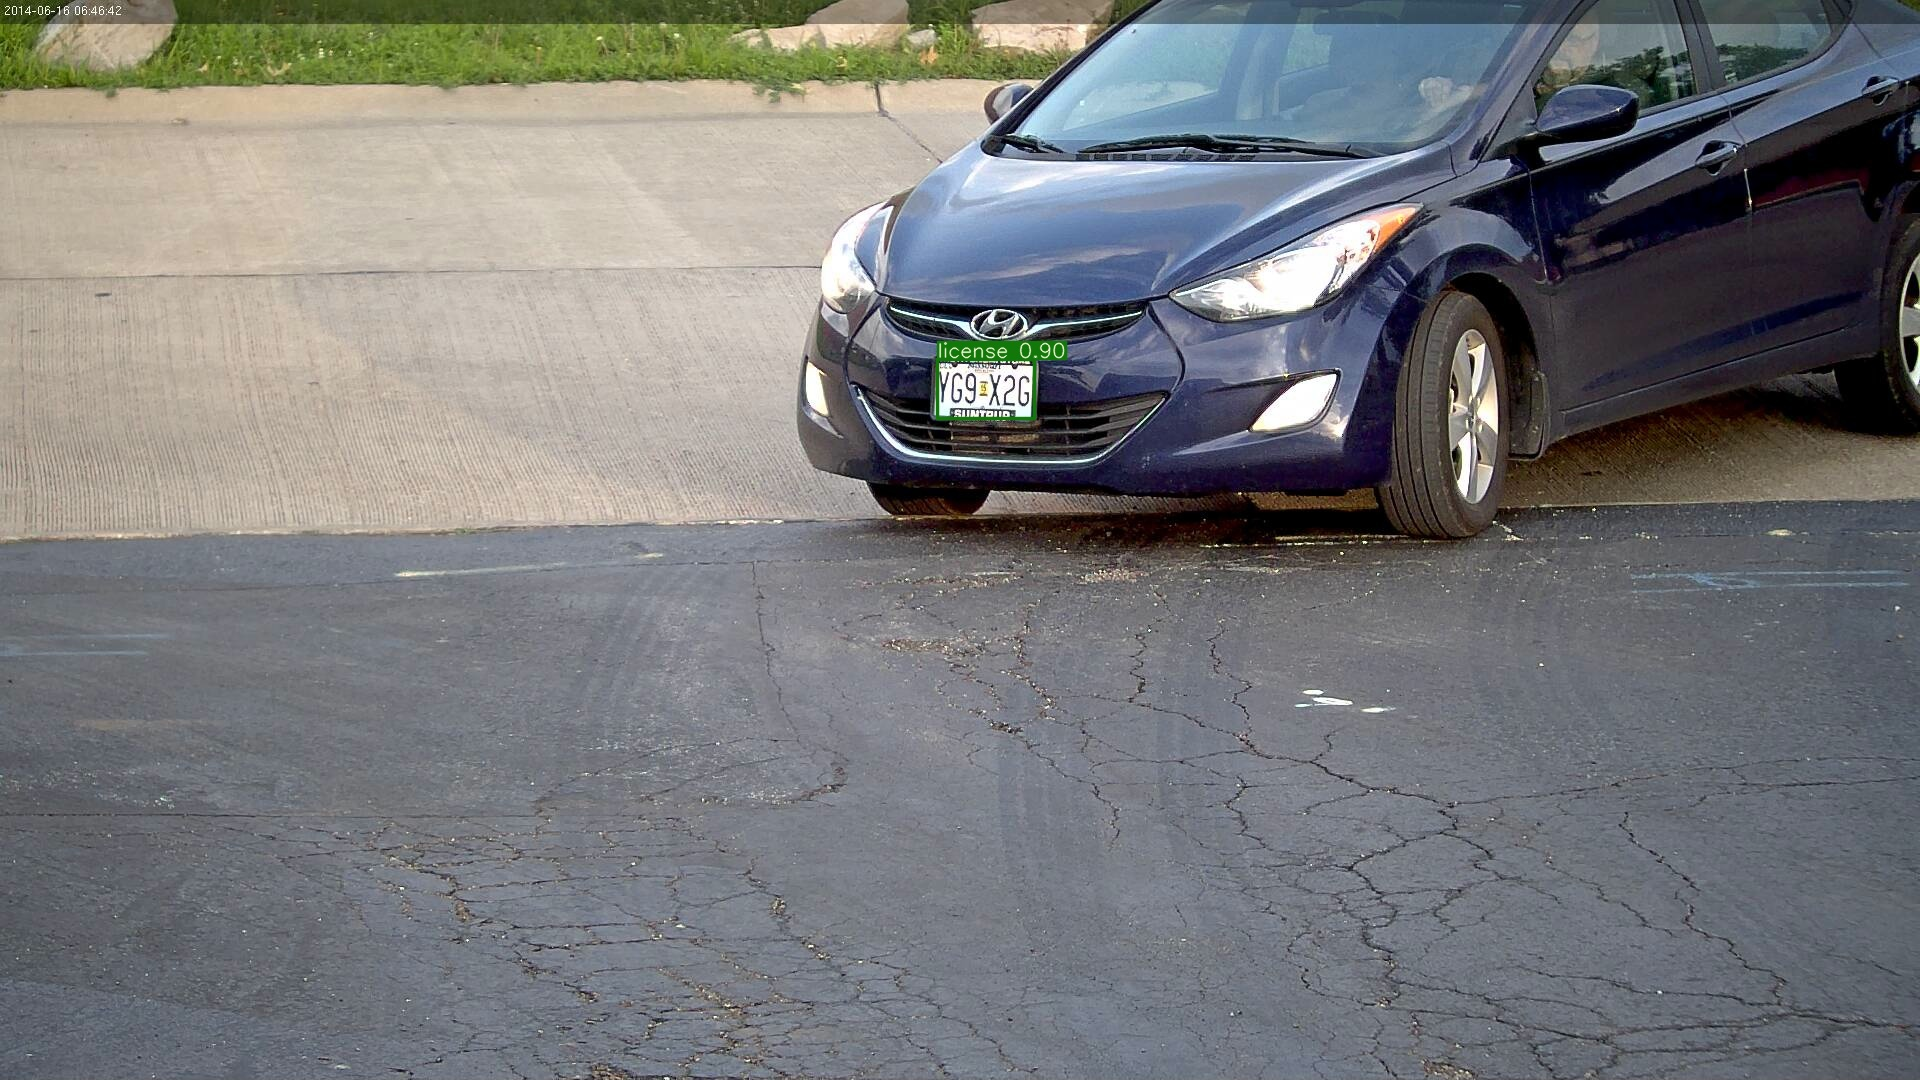

In [ ]:
Image('runs/detect/exp/0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.jpg')

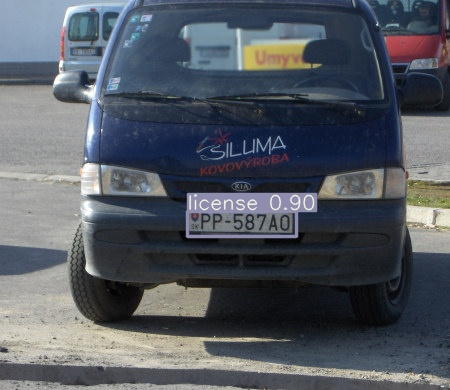

In [ ]:
Image('runs/detect/exp2/test_001.jpg')

In [ ]:
!ls runs/detect/exp/labels

0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.txt  wts-lg-000032.txt  wts-lg-000121.txt
1e241dc8-8f18-4955-8988-03a0ab49f813.txt  wts-lg-000033.txt  wts-lg-000122.txt
21d8c31d-3deb-494b-9c63-c0223306fd82.txt  wts-lg-000034.txt  wts-lg-000123.txt
22e54a62-57a8-4a0a-88c1-4b9758f67651.txt  wts-lg-000035.txt  wts-lg-000124.txt
316b64c0-55bf-4079-a1c0-d93f461a576f.txt  wts-lg-000036.txt  wts-lg-000125.txt
33fa5185-0286-4e8f-b775-46162eba39d4.txt  wts-lg-000037.txt  wts-lg-000126.txt
37170dd1-2802-4e38-b982-c5d07c64ff67.txt  wts-lg-000038.txt  wts-lg-000127.txt
3850ba91-3c64-4c64-acba-0c46b61ec0da.txt  wts-lg-000039.txt  wts-lg-000128.txt
4be2025c-09f7-4bb0-b1bd-8e8633e6dec1.txt  wts-lg-000040.txt  wts-lg-000129.txt
5b562a61-34ad-4f00-9164-d34abb7a38e4.txt  wts-lg-000041.txt  wts-lg-000130.txt
7fbfbe28-aecb-45be-bd05-7cf26acb3c5c.txt  wts-lg-000042.txt  wts-lg-000131.txt
c9368c55-210d-456c-a5ef-c310e60039ec.txt  wts-lg-000043.txt  wts-lg-000132.txt
car11.txt				  wts-lg-000044.txt  wts-lg-000133.txt


In [ ]:
# read .txt to get x,y,w,h of ALPR
def read_txt(filepath):
    f = open(filepath, 'r')
    lines = f.readlines()
         
    # read objects from each line of .txt
    objects = []
    for line in lines:
        line=line.rstrip()
        obj = [int(float(i)) for i in line.split(' ')]
        objects.append(obj)
    #print(objects)
    return objects

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13953 sha256=1eb71109127b54cd1a3d5c0f78d0dae3d83c64d18aa436490f4f8e6e13d50f12
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [ ]:
DETECT_PATH = '/content/yolov5/runs/detect/exp/'
IMG_NAME    = 'us10'

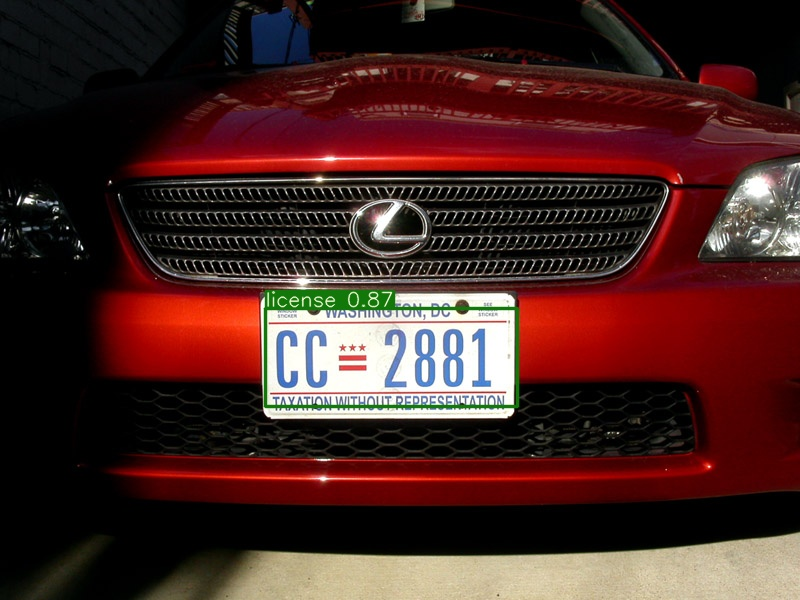

In [ ]:
Image(DETECT_PATH+IMG_NAME+'.jpg')